In [46]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [60]:
#Step1: Upload 'insurance.csv' file
uploaded = files.upload()
df = pd.read_csv("insurance.csv")
print("Data Summary:\n", df.describe())

Saving insurance.csv to insurance (7).csv
Data Summary:
                age          bmi     children       charges
count  1338.000000  1333.000000  1338.000000   1338.000000
mean     39.207025    30.658545     1.094918  13270.422265
std      14.049960     6.092785     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.315000     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.675000     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [62]:
# Step 2: Handle missing values by replacing them with mean (only numeric columns)
numeric_features = ['age', 'bmi', 'children', 'charges']
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].mean())

In [63]:
# Step 3: Separate features (X) and target variable (y)
X = df.drop('charges', axis=1)
y = df['charges']

In [64]:
# Step 4: Set up OneHotEncoder for categorical variables
categorical_features = ['sex', 'smoker', 'region']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

In [65]:
# Step 5: Create a pipeline: Preprocessing + Linear Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [66]:
# Step 6: Split the dataset (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [67]:
# Step 7: Fit the pipeline model and predict
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [68]:
# Step 8: Evaluate the model and adjust Adjusted R² Calculation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
n = len(y_test)
p = len(X_train.columns)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [69]:
# Step 9: Extract model coefficients and intercept
regressor = pipeline.named_steps['regressor']
onehot_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
numerical_features = [col for col in X.columns if col not in categorical_features]
all_feature_names = np.concatenate([onehot_feature_names, numerical_features])


In [70]:
#Step 10:  Create a summary table and model intercept
coefficients_table = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': regressor.coef_
})

# Model Intercept
intercept = regressor.intercept_

In [71]:
# Step 11: Output Results
print("R^2 Score:", round(r2, 4))
print("Adjusted R^2 Score:", round(adjusted_r2, 4))
print("Model Intercept:", round(intercept, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("Root Mean Squared Error (RMSE):", round(rmse, 4))
print("\nModel Coefficients:")
print(coefficients_table)

R^2 Score: 0.7696
Adjusted R^2 Score: 0.7661
Model Intercept: -12124.1334
Mean Absolute Error (MAE): 4131.5105
Root Mean Squared Error (RMSE): 5811.6998

Model Coefficients:
            Feature   Coefficient
0          sex_male    125.769487
1        smoker_yes  23636.893270
2  region_northwest   -479.197817
3  region_southeast   -892.679970
4  region_southwest   -888.777642
5               age    261.929552
6               bmi    338.732514
7          children    419.370610


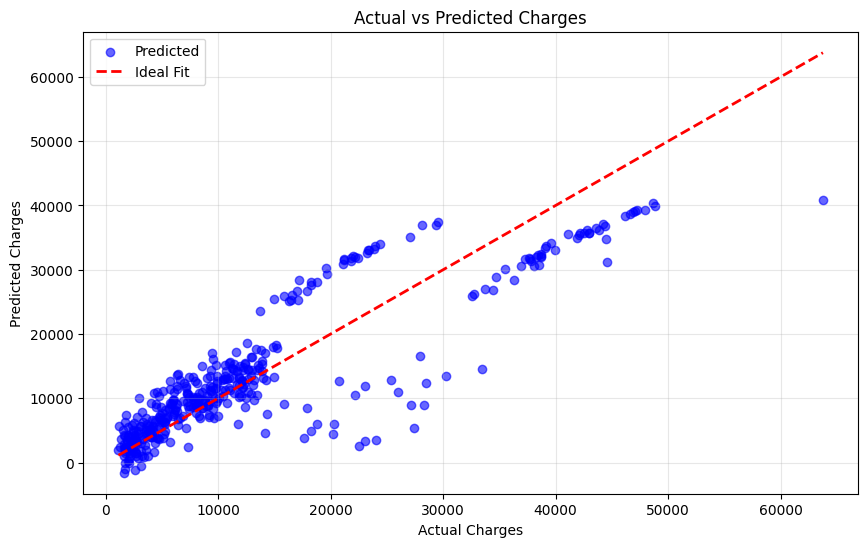

In [72]:
# Step 12: Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, c='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Ideal Fit')
plt.title('Actual vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.grid(alpha=0.3)
plt.show()